# Análise dos casos de óbito de Covid-19 em Indaiatuba

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as wb
from scipy.stats import norm

# 1. Extração dos dados 
Fonte: G1 - Campinas

https://g1.globo.com/sp/campinas-regiao/noticia/2020/06/28/coronavirus-prefeituras-da-regiao-de-campinas-confirmam-novos-casos-neste-domingo-28-de-junho.ghtml

In [2]:
base = pd.read_excel("CovidIndaiatuba.xlsx")

In [3]:
base.tail()

,Obitos,Data,Sexo,Idade,anos,Comorbidade
55,56,2020-06-24,Homem,54,"anos,","Sem Comorbidade, ex-tabagista."
56,57,2020-06-24,Homem,65,"anos,",Com Comorbidades
57,58,2020-06-25,Homem,59,"anos,",Sem Comorbidade
58,59,2020-06-26,Homem,53,"anos,",Com Comorbidades
59,60,2020-06-27,Homem,74,"anos,",Com Comorbidades


# 2. Criação das colunas: MesMorte, diferençaDias e MédiaMovel - concatenação 

In [4]:
base.groupby(base['Data'].dt.month)['Obitos'].sum()
base['MesMorte'] = base['Data'].dt.month
base['diferencaDias'] = base['Data'] - base['Data'].min()
base['MédiaMovel'] = base['Obitos'].rolling(2).mean()
base

,Obitos,Data,Sexo,Idade,anos,Comorbidade,MesMorte,diferencaDias,MédiaMovel
0,1,2020-03-31,Homem,64,"anos,",Com Comorbidades,3,0 days,NaN
1,2,2020-04-13,Mulher,50,"anos,",Com Comorbidades,4,13 days,1.5
2,3,2020-04-18,Mulher,52,"anos,",Sem Comorbidade,4,18 days,2.5
3,4,2020-04-21,Homem,64,"anos,",Com Comorbidades,4,21 days,3.5
4,5,2020-04-24,Mulher,61,"anos,",Com Comorbidades,4,24 days,4.5
5,6,2020-05-02,Mulher,83,"anos,",Com Comorbidades,5,32 days,5.5
6,7,2020-05-06,Homem,38,"anos,",Com Comorbidades,5,36 days,6.5
7,8,2020-05-06,Homem,76,"anos,",Com Comorbidades,5,36 days,7.5
8,9,2020-05-07,Homem,30,"anos,",Com Comorbidades,5,37 days,8.5
9,10,2020-05-07,Homem,55,"anos,","Sem Comorbidade, ex-tabagista.",5,37 days,9.5


# 3. Cálculo por Sexo

In [5]:
pd.crosstab(base['Sexo'],base['Sexo'])

Sexo,Homem,Mulher
Sexo,,
Homem,37,0
Mulher,0,23


In [6]:
print ('Sexo em %')
Afetados = base['Sexo'].value_counts(normalize=True)
print (str(round(Afetados, 4) *100)) 

Sexo em %
Homem     61.67
Mulher    38.33
Name: Sexo, dtype: float64


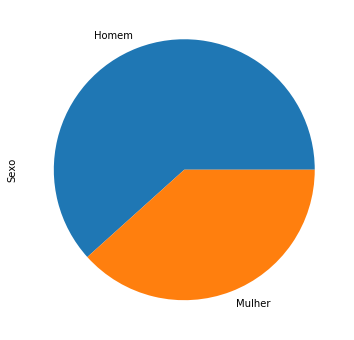

In [50]:
base['Sexo'].value_counts().plot(kind = "pie", figsize = (6,6))

# 4. Agrupando os dados pelo mês do óbito

In [67]:
ObitosMes = base.groupby(base['Data'].dt.month)['Obitos'].count()
ObitosMes

Data
3     1
4     4
5    22
6    33
Name: Obitos, dtype: int64

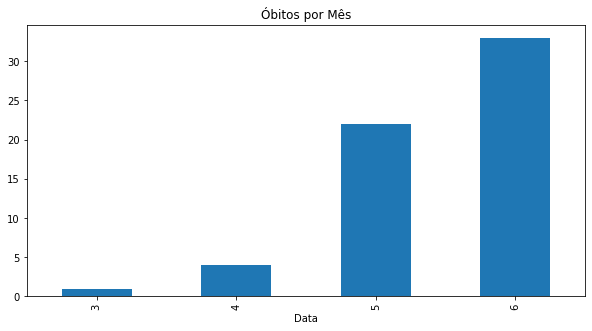

In [65]:
ObitosMes.plot(kind = "bar", figsize = (10,5), title='Óbitos por Mês')

# 4.1 Variação percentual de óbitos por mês

In [70]:
ObitosMes1 = ObitosMes.shift(1)

In [62]:
variacao = (df - df1)/df1 * 100
variacao

Data
3      NaN
4    300.0
5    450.0
6     50.0
Name: Obitos, dtype: float64

# 5. Calculando o total de dias desde a primeira morte

In [ ]:
a = base['diferencaDias'] = base['Data'] - base['Data'].min()
a.tail()

# 6. Verifando se com coborbidades ou sem comorbidades

In [ ]:
pd.crosstab(base['Comorbidade'],base['Comorbidade'])

In [ ]:
base['Comorbidade'].value_counts().head().plot(kind = "barh", figsize = (6,6))

# 7. Gráfico com exibição dos Óbitos no tempo

In [ ]:
base.plot(x='Data', y='Obitos', figsize=(13,6));
plt.title('Óbitos em Indaiatuba')
plt.ylabel('Obitos')
plt.xlabel('Data')
plt.show()

# 8. Média de idades dos óbitos


In [ ]:
base['Idade'].mean()

# 9 .Desvio Padrão de idades dos óbitos

In [ ]:
base['Idade'].std()

# 10. Mediana de idades dos óbitos

In [ ]:
base['Idade'].median()

# 11. Frequencia de idades dos óbitos

In [ ]:
base['Idade'].mode()

# 12. Gráfico com a Frequencia de idade dos óbitos

In [ ]:
base['Idade'].value_counts().plot(kind='bar',figsize = (10,5), title='Mortes/Idade')

# 13. Caculando log para cálculo para simulação

In [ ]:
log_obitos = np.log(1 + base['Obitos'].pct_change())

In [ ]:
base['Obitos'].tail()

# 14. Gráfico com log para cálculo da simulção

In [ ]:
log_obitos.plot(figsize=(10,6))

In [ ]:
u = log_obitos.mean()
u

In [ ]:
var = log_obitos.var()
var

In [ ]:
drift = u - (0.5 * var)
drift

In [ ]:
stdev = log_obitos.std()
stdev

In [ ]:
type(drift)

In [ ]:
type(stdev)

In [ ]:
np.array(drift)

In [ ]:
drift

In [ ]:
stdev

In [ ]:
norm.ppf(0.95)

In [ ]:
x = np.random.rand(10,2)
x

In [ ]:
norm.ppf(x)

In [ ]:
z= norm.ppf(np.random.rand(10,4))
z

In [ ]:
t_intervals = 30
iterations = 10

In [ ]:
daily_obitos = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_obitos

In [ ]:
last_data = base['Obitos'].iloc[-1]
last_data

In [ ]:
obito_list = np.zeros_like(daily_obitos)
obito_list

In [ ]:
obito_list[0] = last_data
obito_list

In [ ]:
for t in range (1, t_intervals):
    obito_list[t] = obito_list[t-1]* daily_obitos[t]

In [ ]:
obito_list

In [ ]:
obito_list.min()

In [ ]:
obito_list.max()

In [ ]:
obito_list.mean()

In [ ]:
obito_list.std()

In [ ]:
np.median(obito_list)

# 15. Simulação de Monte Carlo para os óbitos em Indaiatuba

In [ ]:
plt.figure(figsize=(19,9))
plt.plot(obito_list);
plt.title('SIMULAÇÃO DE MONTE CARLO');
plt.xlabel('REPETIÇÕES'); #definindo nome do eixo X
plt.ylabel('Número de Óbitos'); #definindo nome do eixo Y


In [ ]:
print(f'Óbitos mínimos, {obito_list.min():.0f}'' pessoas')
print(f'Óbitos mediana, {np.median(obito_list):.0f}'' pessoas')
print(f'Óbitos médio, {obito_list.mean():.0f}'' pessoas')
print(f'Óbitos máximo, {obito_list.max():.0f}'' pessoas')
print('Óbitos atual,',(str(round(base['Obitos'].iloc[-1]))),'pessoas') #informar o ticker

# 16. Cálculo de mortes por dia

In [ ]:
diferencaDias = base['diferencaDias'] = base['Data'] - base['Data'].min()
diferencaDias.tail()

In [ ]:
last_data

In [ ]:
diasCorridos = a.loc[59:].astype('timedelta64[D]') #atualizar com índice da última data = last_data

In [ ]:
diasCorridos

In [ ]:
ObitosDia = last_data/diasCorridos
ObitosDia

# Principais Conclusões

1 A cada dois dias uma pessoa vem a óbito

2 Predominância do sexo masculino

3 O viés é ascendente